# Laboratorium 1
# Arytmetyka komputerowa

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import time

___

## Zadanie 1 Sumowanie liczb pojedynczej precyzji

### 1.  Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych w tablicy o 
### N = 10^7 elementach. Tablica wypełniona jest tą samą wartością v z przedziału [0.1,0.9] np. v = 0.53125.

In [11]:
def sum_of_numbers(numbers):
    sum_ = np.float32(0)
    for number in numbers:
        sum_ += number
    return sum_
    
N = 10_000_000
v = np.float32(0.53125)
table_of_numbers = np.full(shape=N, fill_value=v)
calculated_value = sum_of_numbers(table_of_numbers)

5030840.5

___

### 2.  Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak duży?

In [12]:
expected_value = 0.53125 * 10_000_000
absolute_error = abs(expected_value - calculated_value)
relative_error = absolute_error / expected_value

print(absolute_error)
print(100 * round(relative_error, 4),"%")

281659.5
5.3 %


#### Tak duży błąd względny jest spowodowany tym, że w komputerze nie da się dokładnie zapisać liczb zmiennoprzecinkowych co prowadzi do tego, że błąd ten powiększa się przy każdej operacji dodawania. Dodatkowo kiedy dodajemy liczby o różnych rzędzach wielkości błąd względny się powiększa z powodu przesuwania przecinka aby dodać liczby.

---

### 3.  W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (raportuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

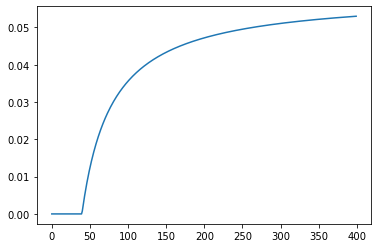

In [13]:
def relative_error_transition(v=np.float32(0.53125), N=10_000_000):
    
    sum_ = np.float32(0)
    real_value = 0
    relative_errors = []
    
    for i in range(N):
        sum_ += v
        real_value += v
        if i % 25000 == 0:
            relative_error = abs(real_value - sum_) / real_value
            relative_errors.append(relative_error)
    
    return relative_errors
    
plt.plot(relative_error_transition())

#### Na początku błąd względny jest tak mały, że jest obliczany jako 0, następnie przy około 40. pomiarze błąd zaczyna rosnąć, wyglądem funkcja błędu przypomina logarytm naturalny. Funkcja jest monotonicznie rosnąca, jednak zwalnia szybkość przrostu w okolicach błędu wielkości 0.04.

### 4.  Zaimplementuj rekurencyjny algorytm sumowania.

In [30]:
# N = 10_000_000
# v = np.float32(0.53125)
# table_of_numbers = np.full(shape=N, fill_value=v)

def recursive_sum_of_numbers(numbers):
    if len(numbers) == 2:
        return numbers[0] + numbers[1]
    if len(numbers) == 1:
        return numbers[0]
    return recursive_sum_of_numbers(numbers[:len(numbers) // 2]) + recursive_sum_of_numbers(numbers[-len(numbers) // 2:])
    
calculated_value = recursive_sum_of_numbers(table_of_numbers)

### 5.  Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie zmalał?

In [28]:
expected_value = 0.53125 * 10_000_000
absolute_error = abs(expected_value - calculated_value)
relative_error = absolute_error / expected_value

print(absolute_error)
print(100 * round(relative_error, 4),"%")

0.0
0.0 %


#### Błąd względny znacznie zmalał, ponieważ dodawane w tym przypadku liczby miał ten sam albo bardzo zbliżony rząd wielkości

### 6.  Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [31]:
start = time.time()
sum_of_numbers(table_of_numbers)
end = time.time()
print(end - start)

1.0275843143463135


In [32]:
start = time.time()
recursive_sum_of_numbers(table_of_numbers)
end = time.time()
print(end - start)

5.233598470687866


### 7.  Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekurencyjnego zwraca niezerowy błąd.

In [54]:
T = [np.float32(0.001), np.float32(0.1)] * 10_000_000

expected_value = sum(T)
absolute_error = abs(expected_value - recursive_sum_of_numbers(T))
relative_error = absolute_error / expected_value

print(absolute_error)

0.10962386429309845


## Zadanie 2 Algorytm Kahana

In [57]:
def Kahan_algorithm(numbers):
    _sum = np.float32(0)
    error = np.float32(0)
    
    for i in range(len(numbers)):
        y = numbers[i] - error
        temp = _sum + y
        error = (temp - _sum) - y
        _sum = temp
    return _sum

### 1.  Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejściowych jak w przypadku testów z Zadania 1.

In [58]:
expected_value = 0.53125 * 10_000_000
absolute_error = abs(expected_value - Kahan_algorithm(table_of_numbers))
relative_error = absolute_error / expected_value

print(absolute_error)
print(100 * round(relative_error, 4),"%")

0.0
0.0 %


### 2.  Wyjaśnij dlaczego algorytm Kahana ma znacznie lepsze własności numeryczne? Do czego służy zmienna error?

#### po

### 3.  Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekurencyjnego dla tych samych danych wejściowych.

In [59]:
start = time.time()
recursive_sum_of_numbers(T)
end = time.time()
print(end - start)

8.550249814987183


In [60]:
start = time.time()
Kahan_algorithm(T)
end = time.time()
print(end - start)

4.895787239074707


## Zadanie 3 Sumy częściowe

### Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna oraz funkcję eta Dirichleta

#### DZETA

In [70]:
ss = [2, 3.6667, 5, 7.2, 10]
ns = [50, 100, 200, 500, 1000]

In [83]:
def dzeta_function_forward_float32(s, n):
    s = np.float32(s)
    sum_ = np.float32(0)
    for i in range(1, n + 1):
        sum_ += np.float32(1 / (i ** s))
    return sum_

def dzeta_function_backward_float32(s, n):
    s = np.float32(s)
    sum_ = np.float32(0)
    for i in range(n, 0, -1):
        sum_ += np.float32(1 / (i ** s))
    return sum_

def dzeta_function_forward_float64(s, n):
    s = np.float64(s)
    sum_ = np.float64(0)
    for i in range(1, n + 1):
        sum_ += np.float64(1 / (i ** s))
    return sum_

def dzeta_function_backward_float64(s, n):
    s = np.float64(s)
    sum_ = np.float64(0)
    for i in range(n, 0, -1):
        sum_ += np.float64(1 / (i ** s))
    return sum_

In [84]:
for s in ss:
    for n in ns:
        print("\ns =", s,", n =", n)
        print("\n\tForward")
        forward32 = dzeta_function_forward_float32(s, n)
        forward64 = dzeta_function_forward_float64(s, n)
        print("\tfloat:", forward32, 
              "\n\tdouble:", forward64,
             "\n\tdifference:", abs(forward64 - forward32))
        
        print("\n\tBackward")
        backward32 = dzeta_function_backward_float32(s, n)
        backward64 = dzeta_function_backward_float64(s, n)
        print("\tfloat:", backward32, 
              "\n\tdouble:", backward64,
             "\n\tdifference:", abs(backward64 - backward32))


s = 2 , n = 50

	Forward
	float: 1.6251329 
	double: 1.625132733621529 
	difference: 1.8473632001914098e-07

	Backward
	float: 1.6251327 
	double: 1.6251327336215293 
	difference: 5.368225930446613e-08

s = 2 , n = 100

	Forward
	float: 1.634984 
	double: 1.6349839001848923 
	difference: 1.1623356477308278e-07

	Backward
	float: 1.6349839 
	double: 1.634983900184893 
	difference: 2.975725443832289e-09

s = 2 , n = 200

	Forward
	float: 1.6399467 
	double: 1.6399465460149971 
	difference: 1.5312745893503177e-07

	Backward
	float: 1.6399465 
	double: 1.6399465460149973 
	difference: 8.529112038857534e-08

s = 2 , n = 500

	Forward
	float: 1.642936 
	double: 1.642936065514894 
	difference: 7.422766246101276e-08

	Backward
	float: 1.642936 
	double: 1.6429360655148941 
	difference: 7.422766268305736e-08

s = 2 , n = 1000

	Forward
	float: 1.6439348 
	double: 1.6439345666815615 
	difference: 2.7924281598146194e-07

	Backward
	float: 1.6439345 
	double: 1.6439345666815597 
	difference: 7.83

---

#### ETA

In [86]:
def eta_function_forward_float32(s, n):
    s = np.float32(s)
    sum_ = np.float32(0)
    for i in range(1, n + 1):
        if i % 2 == 0:
            sum_ -= np.float32(1 / (i ** s))
        else:
            sum_ += np.float32(1 / (i ** s))
    return sum_

def eta_function_backward_float32(s, n):
    s = np.float32(s)
    sum_ = np.float32(0)
    for i in range(n, 0, -1):
        if i % 2 == 0:
            sum_ -= np.float32(1 / (i ** s))
        else:
            sum_ += np.float32(1 / (i ** s))
    return sum_

def eta_function_forward_float64(s, n):
    s = np.float64(s)
    sum_ = np.float64(0)
    for i in range(1, n + 1):
        if i % 2 == 0:
            sum_ -= np.float64(1 / (i ** s))
        else:
            sum_ += np.float64(1 / (i ** s))
    return sum_

def eta_function_backward_float64(s, n):
    s = np.float64(s)
    sum_ = np.float64(0)
    for i in range(n, 0, -1):
        if i % 2 == 0:
            sum_ -= np.float64(1 / (i ** s))
        else:
            sum_ += np.float64(1 / (i ** s))
    return sum_

In [87]:
for s in ss:
    for n in ns:
        print("\ns =", s,", n =", n)
        print("\n\tForward")
        forward32 = eta_function_forward_float32(s, n)
        forward64 = eta_function_forward_float64(s, n)
        print("\tfloat:", forward32, 
              "\n\tdouble:", forward64,
             "\n\tdifference:", abs(forward64 - forward32))
        
        print("\n\tBackward")
        backward32 = eta_function_backward_float32(s, n)
        backward64 = eta_function_backward_float64(s, n)
        print("\tfloat:", backward32, 
              "\n\tdouble:", backward64,
             "\n\tdifference:", abs(backward64 - backward32))


s = 2 , n = 50

	Forward
	float: 0.822271 
	double: 0.8222710318260295 
	difference: 4.240799966748199e-08

	Backward
	float: 0.82227105 
	double: 0.8222710318260289 
	difference: 1.719664566302015e-08

s = 2 , n = 100

	Forward
	float: 0.8224175 
	double: 0.8224175333741286 
	difference: 3.573924090005676e-08

	Backward
	float: 0.8224175 
	double: 0.8224175333741282 
	difference: 3.573924045596755e-08

s = 2 , n = 200

	Forward
	float: 0.8224547 
	double: 0.822454595922551 
	difference: 9.501067654849038e-08

	Backward
	float: 0.8224546 
	double: 0.8224545959225509 
	difference: 2.4198612891268567e-08

s = 2 , n = 500

	Forward
	float: 0.82246536 
	double: 0.8224650374240963 
	difference: 3.2274054606595826e-07

	Backward
	float: 0.82246506 
	double: 0.8224650374240972 
	difference: 2.471732130082671e-08

s = 2 , n = 1000

	Forward
	float: 0.82246685 
	double: 0.8224665339241114 
	difference: 3.163566503205928e-07

	Backward
	float: 0.82246655 
	double: 0.8224665339241127 
	differenc